In [1]:
MODEL_NAME = 'ResNet'

In [2]:
import numpy as np
import csv
# from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

from model import Network, ResNet
from model import SimpleNET

from config.batchtest_config import *
    
from augmentation import transforms_0
from train import train

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
trainset = datasets.ImageFolder('/dtu/datasets1/02514/hotdog_nothotdog/train', transform=transforms_0)
train_loader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=8)

testset = datasets.ImageFolder('/dtu/datasets1/02514/hotdog_nothotdog/test', transform=transforms_0)
test_loader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=8)

In [4]:
simplenet_batch = SimpleNET(True)
simplenet_nobatch = SimpleNET(False)
resnet_batch = ResNet(n_features=CONV_SIZE, num_res_blocks=NUM_BLOCKS, batchnorm=True)
resnet_nobatch = ResNet(n_features=CONV_SIZE, num_res_blocks=NUM_BLOCKS, batchnorm=False)

loss = nn.BCELoss()

#lr_scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer=optimizer, gamma=DECAY_RATE)

In [5]:
result_dicts = []
#for optimizer in [simplenet_batch, optim_adam, optim_adagrad, optim_adadelta]:
for model in tqdm([simplenet_batch, simplenet_nobatch, resnet_batch, resnet_nobatch], total=4, unit='model'):
    print(f"Training with {model}")
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=1e-4)
    result_dicts.append(train(model, train_loader, test_loader, loss, optimizer, NUM_EPOCHS))

  0%|          | 0/4 [00:00<?, ?model/s]

Training with SimpleNET_batch(
  (convolutional): Sequential(
    (0): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (2): Dropout(p=0.4, inplace=False)
    (3): LeakyReLU(negative_slope=0.01)
    (4): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (6): Dropout(p=0.4, inplace=False)
    (7): LeakyReLU(negative_slope=0.01)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (fully_connected): Sequential(
    (0): Linear(in_features=360000, out_features=32, bias=True)
    (1): Dropout(p=0.4, inplace=False)
    (2): LeakyReLU(negative_slope=0.01)
    (3): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Linear(in_

  0%|          | 0/50 [00:00<?, ?epoch/s]

  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.581	 test: 0.659	 Accuracy train: 69.4%	 test: 63.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.505	 test: 0.768	 Accuracy train: 76.4%	 test: 57.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.459	 test: 0.876	 Accuracy train: 79.8%	 test: 58.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.425	 test: 0.996	 Accuracy train: 81.2%	 test: 56.1%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.367	 test: 0.773	 Accuracy train: 85.5%	 test: 66.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.310	 test: 0.635	 Accuracy train: 87.7%	 test: 74.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.244	 test: 0.646	 Accuracy train: 91.3%	 test: 73.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.198	 test: 0.667	 Accuracy train: 93.4%	 test: 73.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.144	 test: 0.745	 Accuracy train: 95.7%	 test: 74.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.115	 test: 0.814	 Accuracy train: 96.8%	 test: 70.7%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.101	 test: 0.702	 Accuracy train: 97.2%	 test: 73.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.070	 test: 0.785	 Accuracy train: 98.5%	 test: 73.0%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.068	 test: 0.759	 Accuracy train: 98.0%	 test: 73.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.051	 test: 0.728	 Accuracy train: 99.0%	 test: 73.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.045	 test: 0.831	 Accuracy train: 99.0%	 test: 72.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.044	 test: 0.930	 Accuracy train: 98.9%	 test: 70.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.050	 test: 0.855	 Accuracy train: 98.9%	 test: 72.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.040	 test: 0.849	 Accuracy train: 98.8%	 test: 72.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.035	 test: 0.845	 Accuracy train: 99.6%	 test: 73.7%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.027	 test: 1.081	 Accuracy train: 99.7%	 test: 70.0%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.032	 test: 1.399	 Accuracy train: 99.5%	 test: 65.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.029	 test: 0.907	 Accuracy train: 99.4%	 test: 72.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.029	 test: 0.826	 Accuracy train: 99.4%	 test: 73.2%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.030	 test: 0.860	 Accuracy train: 99.3%	 test: 73.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.034	 test: 1.113	 Accuracy train: 98.6%	 test: 70.7%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.035	 test: 0.954	 Accuracy train: 99.1%	 test: 74.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.034	 test: 1.130	 Accuracy train: 99.1%	 test: 68.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.022	 test: 0.889	 Accuracy train: 99.7%	 test: 72.7%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.018	 test: 1.058	 Accuracy train: 99.6%	 test: 72.7%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.014	 test: 1.136	 Accuracy train: 99.8%	 test: 70.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.021	 test: 1.125	 Accuracy train: 99.5%	 test: 72.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.020	 test: 1.077	 Accuracy train: 99.6%	 test: 71.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.029	 test: 0.909	 Accuracy train: 99.0%	 test: 73.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.032	 test: 0.845	 Accuracy train: 99.2%	 test: 72.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.034	 test: 0.931	 Accuracy train: 99.1%	 test: 72.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.035	 test: 0.844	 Accuracy train: 98.5%	 test: 72.1%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.026	 test: 0.871	 Accuracy train: 99.2%	 test: 72.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.025	 test: 1.034	 Accuracy train: 99.4%	 test: 69.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.032	 test: 0.944	 Accuracy train: 99.1%	 test: 69.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.036	 test: 0.832	 Accuracy train: 98.8%	 test: 72.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.030	 test: 1.101	 Accuracy train: 99.1%	 test: 70.2%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.031	 test: 0.933	 Accuracy train: 98.7%	 test: 69.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.024	 test: 1.168	 Accuracy train: 99.4%	 test: 70.1%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.030	 test: 0.975	 Accuracy train: 99.0%	 test: 73.0%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.021	 test: 1.023	 Accuracy train: 99.5%	 test: 71.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.017	 test: 0.966	 Accuracy train: 99.5%	 test: 73.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.027	 test: 0.899	 Accuracy train: 99.1%	 test: 72.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.030	 test: 0.857	 Accuracy train: 98.9%	 test: 73.1%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.022	 test: 0.993	 Accuracy train: 99.4%	 test: 72.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.035	 test: 1.254	 Accuracy train: 99.0%	 test: 67.5%
Training with SimpleNET_nobatch(
  (convolutional): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): Dropout(p=0.4, inplace=False)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (4): Dropout(p=0.4, inplace=False)
    (5): LeakyReLU(negative_slope=0.01)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fully_connected): Sequential(
    (0): Linear(in_features=360000, out_features=32, bias=True)
    (1): Dropout(p=0.4, inplace=False)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Linear(in_features=32, out_features=1, bias=True)
    (4): Sigmoid()
  )
)


  0%|          | 0/50 [00:00<?, ?epoch/s]

  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.757	 test: 0.670	 Accuracy train: 59.4%	 test: 60.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.619	 test: 0.608	 Accuracy train: 66.5%	 test: 69.2%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.578	 test: 0.614	 Accuracy train: 72.4%	 test: 67.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.546	 test: 0.553	 Accuracy train: 74.2%	 test: 72.7%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.535	 test: 0.558	 Accuracy train: 74.5%	 test: 70.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.528	 test: 0.553	 Accuracy train: 75.8%	 test: 73.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.480	 test: 0.552	 Accuracy train: 78.0%	 test: 72.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.452	 test: 0.558	 Accuracy train: 79.4%	 test: 72.0%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.487	 test: 0.568	 Accuracy train: 81.0%	 test: 71.1%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.452	 test: 0.540	 Accuracy train: 80.1%	 test: 74.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.392	 test: 0.549	 Accuracy train: 83.6%	 test: 72.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.371	 test: 0.749	 Accuracy train: 84.1%	 test: 73.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.326	 test: 0.761	 Accuracy train: 86.7%	 test: 73.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.303	 test: 0.702	 Accuracy train: 86.6%	 test: 74.0%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.283	 test: 0.877	 Accuracy train: 88.4%	 test: 74.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.245	 test: 0.906	 Accuracy train: 89.3%	 test: 74.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.219	 test: 1.013	 Accuracy train: 90.9%	 test: 74.7%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.205	 test: 0.693	 Accuracy train: 91.9%	 test: 72.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.274	 test: 0.655	 Accuracy train: 88.8%	 test: 72.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.224	 test: 1.301	 Accuracy train: 91.5%	 test: 72.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.165	 test: 1.603	 Accuracy train: 93.6%	 test: 71.2%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.129	 test: 1.989	 Accuracy train: 95.2%	 test: 72.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.102	 test: 1.426	 Accuracy train: 96.2%	 test: 73.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.097	 test: 1.689	 Accuracy train: 96.6%	 test: 72.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.101	 test: 2.557	 Accuracy train: 96.3%	 test: 71.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.091	 test: 3.592	 Accuracy train: 96.1%	 test: 71.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.072	 test: 2.645	 Accuracy train: 97.1%	 test: 71.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.055	 test: 2.745	 Accuracy train: 97.8%	 test: 72.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.074	 test: 2.256	 Accuracy train: 97.3%	 test: 71.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.061	 test: 5.635	 Accuracy train: 97.3%	 test: 70.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.069	 test: 2.662	 Accuracy train: 97.6%	 test: 71.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.042	 test: 4.573	 Accuracy train: 98.4%	 test: 71.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.043	 test: 2.809	 Accuracy train: 98.1%	 test: 72.0%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.047	 test: 2.560	 Accuracy train: 98.1%	 test: 71.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.045	 test: 3.846	 Accuracy train: 98.4%	 test: 70.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.036	 test: 4.284	 Accuracy train: 98.7%	 test: 71.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.056	 test: 2.592	 Accuracy train: 98.0%	 test: 72.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.037	 test: 3.472	 Accuracy train: 98.5%	 test: 72.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.039	 test: 5.221	 Accuracy train: 98.6%	 test: 72.2%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.032	 test: 4.246	 Accuracy train: 99.1%	 test: 71.1%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.032	 test: 5.116	 Accuracy train: 98.8%	 test: 71.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.048	 test: 4.362	 Accuracy train: 97.9%	 test: 68.7%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.030	 test: 4.492	 Accuracy train: 98.9%	 test: 70.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.030	 test: 3.892	 Accuracy train: 99.0%	 test: 72.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.020	 test: 4.082	 Accuracy train: 99.4%	 test: 72.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.016	 test: 5.601	 Accuracy train: 99.4%	 test: 71.7%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.024	 test: 6.631	 Accuracy train: 99.2%	 test: 70.0%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.030	 test: 4.145	 Accuracy train: 98.9%	 test: 72.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.038	 test: 4.920	 Accuracy train: 99.3%	 test: 71.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.018	 test: 5.659	 Accuracy train: 99.4%	 test: 71.1%
Training with ResNet(
  (res_blocks): Sequential(
    (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): ResNetBlock(
      (nonLinearActivation_fwd): ReLU()
      (convolution): Sequential(
        (0): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU()
        (2): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (3): ResNetBlock(
      (nonLinearActivation_fwd): ReLU()
      (convolution): Sequential(
        (0): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU()
        (2): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (4): ResNetBlock(
      (nonLinearActivation_fwd): ReLU()
      (convolution): Sequential(
        (0): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU()
        (2): Conv2d(4, 4, kernel_siz

  0%|          | 0/50 [00:00<?, ?epoch/s]

  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.683	 test: 0.670	 Accuracy train: 56.4%	 test: 64.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.662	 test: 0.729	 Accuracy train: 60.8%	 test: 64.7%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.636	 test: 0.685	 Accuracy train: 66.0%	 test: 63.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.609	 test: 0.595	 Accuracy train: 69.4%	 test: 70.7%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.592	 test: 0.582	 Accuracy train: 70.9%	 test: 72.0%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.567	 test: 0.597	 Accuracy train: 72.7%	 test: 71.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.557	 test: 0.574	 Accuracy train: 73.1%	 test: 71.7%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.554	 test: 0.576	 Accuracy train: 73.0%	 test: 71.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.553	 test: 0.590	 Accuracy train: 72.5%	 test: 67.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.555	 test: 0.600	 Accuracy train: 72.9%	 test: 70.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.533	 test: 0.572	 Accuracy train: 74.6%	 test: 71.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.509	 test: 0.566	 Accuracy train: 76.6%	 test: 72.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.497	 test: 0.560	 Accuracy train: 76.7%	 test: 71.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.451	 test: 0.563	 Accuracy train: 79.4%	 test: 72.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.415	 test: 0.575	 Accuracy train: 82.2%	 test: 67.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.360	 test: 0.767	 Accuracy train: 85.8%	 test: 71.1%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.325	 test: 0.589	 Accuracy train: 87.2%	 test: 72.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.286	 test: 0.567	 Accuracy train: 90.0%	 test: 71.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.224	 test: 0.610	 Accuracy train: 92.4%	 test: 69.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.185	 test: 0.618	 Accuracy train: 94.2%	 test: 71.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.152	 test: 0.666	 Accuracy train: 95.5%	 test: 72.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.130	 test: 0.645	 Accuracy train: 96.6%	 test: 72.0%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.115	 test: 0.642	 Accuracy train: 97.0%	 test: 71.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.098	 test: 0.678	 Accuracy train: 97.5%	 test: 72.0%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.096	 test: 0.699	 Accuracy train: 97.4%	 test: 72.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.087	 test: 0.790	 Accuracy train: 97.9%	 test: 72.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.084	 test: 0.761	 Accuracy train: 97.9%	 test: 72.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.080	 test: 0.753	 Accuracy train: 98.0%	 test: 72.2%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.067	 test: 0.711	 Accuracy train: 98.0%	 test: 72.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.080	 test: 0.886	 Accuracy train: 98.0%	 test: 74.0%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.060	 test: 0.839	 Accuracy train: 98.5%	 test: 74.0%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.066	 test: 0.799	 Accuracy train: 98.2%	 test: 70.7%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.064	 test: 0.888	 Accuracy train: 98.4%	 test: 73.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.049	 test: 0.942	 Accuracy train: 98.9%	 test: 73.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.053	 test: 0.778	 Accuracy train: 98.6%	 test: 70.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.044	 test: 0.963	 Accuracy train: 99.2%	 test: 73.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.047	 test: 0.843	 Accuracy train: 98.9%	 test: 71.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.037	 test: 0.984	 Accuracy train: 99.2%	 test: 73.1%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.038	 test: 0.921	 Accuracy train: 99.1%	 test: 73.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.041	 test: 0.891	 Accuracy train: 99.1%	 test: 72.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.050	 test: 0.919	 Accuracy train: 98.5%	 test: 73.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.057	 test: 0.937	 Accuracy train: 98.1%	 test: 73.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.043	 test: 1.168	 Accuracy train: 98.7%	 test: 74.2%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.037	 test: 0.955	 Accuracy train: 99.1%	 test: 72.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.037	 test: 0.981	 Accuracy train: 99.3%	 test: 73.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.034	 test: 0.834	 Accuracy train: 99.2%	 test: 71.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.029	 test: 1.009	 Accuracy train: 99.4%	 test: 74.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.029	 test: 1.076	 Accuracy train: 99.2%	 test: 73.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.032	 test: 0.815	 Accuracy train: 99.2%	 test: 70.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.047	 test: 1.152	 Accuracy train: 98.6%	 test: 74.0%
Training with ResNet(
  (res_blocks): Sequential(
    (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): ResNetBlock(
      (nonLinearActivation_fwd): ReLU()
      (convolution): Sequential(
        (0): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU()
        (2): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (3): ResNetBlock(
      (nonLinearActivation_fwd): ReLU()
      (convolution): Sequential(
        (0): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU()
        (2): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (4): ResNetBlock(
      (nonLinearActivation_fwd): ReLU()
      (convolution): Sequential(
        (0): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU()
        (2): Conv2d(4, 4, kernel_siz

  0%|          | 0/50 [00:00<?, ?epoch/s]

  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 29.289	 test: 0.692	 Accuracy train: 48.3%	 test: 51.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.694	 test: 0.694	 Accuracy train: 48.9%	 test: 53.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.692	 test: 0.696	 Accuracy train: 51.7%	 test: 48.1%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.691	 test: 0.694	 Accuracy train: 52.4%	 test: 49.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.691	 test: 0.693	 Accuracy train: 52.0%	 test: 54.7%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.688	 test: 0.694	 Accuracy train: 54.4%	 test: 50.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.685	 test: 0.692	 Accuracy train: 54.4%	 test: 53.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.678	 test: 0.700	 Accuracy train: 57.9%	 test: 50.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.684	 test: 0.689	 Accuracy train: 55.8%	 test: 57.2%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.676	 test: 0.682	 Accuracy train: 58.1%	 test: 57.2%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.643	 test: 0.655	 Accuracy train: 62.6%	 test: 61.1%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.551	 test: 0.686	 Accuracy train: 72.3%	 test: 62.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.410	 test: 0.876	 Accuracy train: 80.6%	 test: 63.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.298	 test: 0.807	 Accuracy train: 87.5%	 test: 62.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.216	 test: 1.651	 Accuracy train: 90.6%	 test: 61.1%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.150	 test: 1.323	 Accuracy train: 93.7%	 test: 61.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.135	 test: 1.525	 Accuracy train: 94.6%	 test: 60.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.106	 test: 3.323	 Accuracy train: 95.8%	 test: 59.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.093	 test: 2.702	 Accuracy train: 96.8%	 test: 60.0%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.073	 test: 2.729	 Accuracy train: 97.1%	 test: 60.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.079	 test: 3.332	 Accuracy train: 96.7%	 test: 61.0%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.116	 test: 1.314	 Accuracy train: 95.8%	 test: 59.0%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.070	 test: 2.869	 Accuracy train: 97.1%	 test: 59.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.070	 test: 3.790	 Accuracy train: 96.8%	 test: 60.2%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.054	 test: 6.346	 Accuracy train: 97.6%	 test: 59.6%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.063	 test: 2.797	 Accuracy train: 97.2%	 test: 59.3%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.042	 test: 3.818	 Accuracy train: 97.9%	 test: 60.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.043	 test: 6.945	 Accuracy train: 97.5%	 test: 59.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.044	 test: 4.703	 Accuracy train: 98.1%	 test: 59.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.046	 test: 4.134	 Accuracy train: 97.7%	 test: 60.1%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.045	 test: 4.706	 Accuracy train: 97.3%	 test: 59.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.038	 test: 5.244	 Accuracy train: 97.7%	 test: 61.0%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.034	 test: 4.640	 Accuracy train: 98.0%	 test: 60.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.037	 test: 5.859	 Accuracy train: 97.7%	 test: 60.8%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.046	 test: 2.938	 Accuracy train: 97.9%	 test: 60.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.035	 test: 4.825	 Accuracy train: 98.3%	 test: 59.9%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.028	 test: 7.551	 Accuracy train: 98.5%	 test: 60.0%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.029	 test: 6.409	 Accuracy train: 98.1%	 test: 61.2%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.028	 test: 5.222	 Accuracy train: 98.1%	 test: 61.0%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.035	 test: 6.528	 Accuracy train: 97.9%	 test: 61.1%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.033	 test: 4.189	 Accuracy train: 98.0%	 test: 61.1%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.039	 test: 3.646	 Accuracy train: 97.6%	 test: 60.7%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.029	 test: 4.907	 Accuracy train: 98.1%	 test: 61.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.028	 test: 5.941	 Accuracy train: 98.8%	 test: 61.5%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.041	 test: 6.164	 Accuracy train: 98.7%	 test: 60.0%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.027	 test: 5.896	 Accuracy train: 98.8%	 test: 60.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.026	 test: 6.859	 Accuracy train: 98.5%	 test: 60.7%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.026	 test: 6.622	 Accuracy train: 98.5%	 test: 61.4%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.027	 test: 9.019	 Accuracy train: 98.5%	 test: 61.2%


  0%|          | 0/64 [00:00<?, ?it/s]

Loss train: 0.026	 test: 7.845	 Accuracy train: 98.3%	 test: 61.4%


In [6]:
# saving results
model_names = ["SimpleNET (BatchNorm)", "SimpleNET", "ResNet (BatchNorm)", "ResNet"]
for i, model_dict in enumerate(result_dicts):
    suffix = "final"
    d = model_dict
    if MODEL_NAME == 'ResNet':
        filename = f'results/{model_names[i]}/{CONV_SIZE}_kernel_{NUM_BLOCKS}_blocks_{NUM_EPOCHS}_epochs_{LEARNING_RATE:.0e}_lr_{"Adam"}_optim_{suffix}.csv'
    else:
        filename = f'results/{model_names[i]}/{NUM_EPOCHS}_epochs_{LEARNING_RATE:.0e}_lr_{"Adam"}_optim_{suffix}.csv'
    with open(filename, 'w') as csvFile:
        writer = csv.writer(csvFile)
        writer.writerow(d.keys())
        writer.writerows(zip(*d.values()))

FileNotFoundError: [Errno 2] No such file or directory: 'results/SimpleNET (BatchNorm)/4_kernel_4_blocks_50_epochs_1e-03_lr_Adam_optim_final.csv'

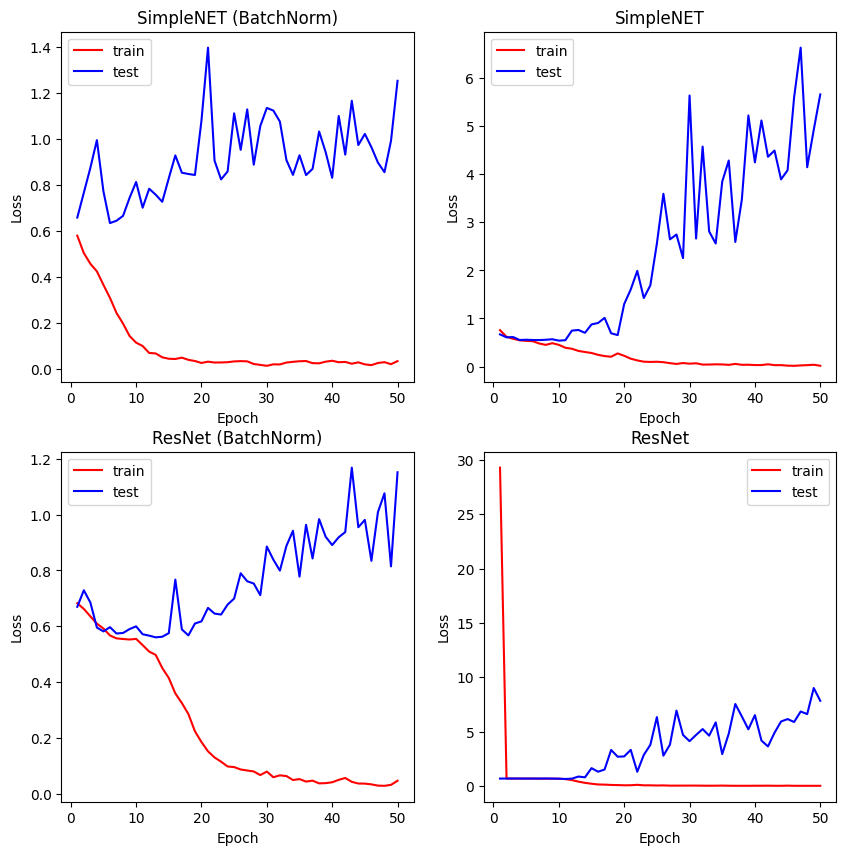

In [12]:
i = 0
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 10))
axs = [ax1, ax2, ax3, ax4]
for i, model_dict in enumerate(result_dicts):
    axs[i].plot([e for e in range(1, NUM_EPOCHS+1)], model_dict['train_loss'], c='r', label='train')
    axs[i].plot([e for e in range(1, NUM_EPOCHS+1)], model_dict['test_loss'], c='b', label='test')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('Loss')
    axs[i].set_title(model_names[i])
    axs[i].legend()

plt.savefig('model_comparison_lr=varying_final.png')
plt.show()


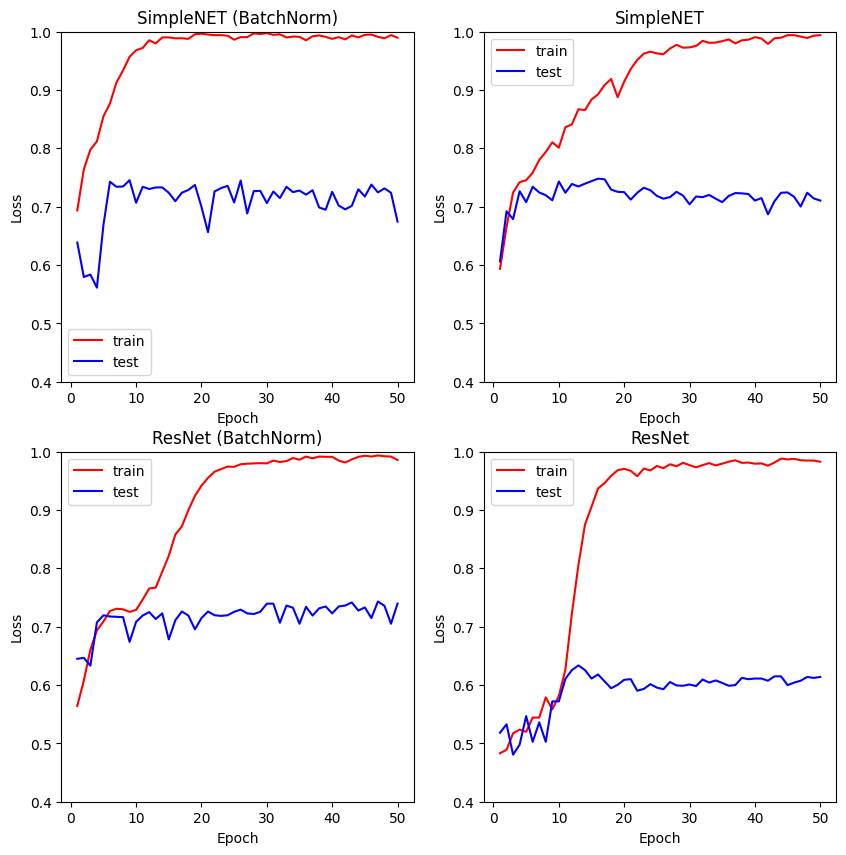

In [11]:
i = 0
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10, 10))
axs = [ax1, ax2, ax3, ax4]
for i, model_dict in enumerate(result_dicts):
    axs[i].plot([e for e in range(1, NUM_EPOCHS+1)], model_dict['train_acc'], c='r', label='train')
    axs[i].plot([e for e in range(1, NUM_EPOCHS+1)], model_dict['test_acc'], c='b', label='test')
    axs[i].set_xlabel('Epoch')
    axs[i].set_ylabel('Loss')
    axs[i].set_ylim([0.4,1])
    axs[i].set_title(model_names[i])
    axs[i].legend()

plt.savefig('model_comparison_acc_lr=varying_final.png')
plt.show()